# Lab | Understanding Descriptive Statistics

In [1]:
#Import the necessary libraries here:
import pandas as pd
import numpy as np
import random
from scipy import stats

# Remove warnings (not necessary)
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Challenge 1
#1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
Hint: you can use the choices function from module random to help you with the simulation.

In [3]:
dice_df = pd.read_csv("roll_the_dice_thousand.csv")
dice_df.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


In [21]:

# Simulate rolling a 6-sided dice 10 times
dice_outcomes = random.choices(range(1, 6), k=10)

# Create a DataFrame to store the results
df = pd.DataFrame({'Roll': range(1, 11), 'Outcome': dice_outcomes})

# Print the DataFrame
print(df)


   Roll  Outcome
0     1        5
1     2        2
2     3        4
3     4        2
4     5        3
5     6        2
6     7        2
7     8        3
8     9        2
9    10        2


In [22]:
print(dice_outcomes)

[5, 2, 4, 2, 3, 2, 2, 3, 2, 2]


#
. Here using random.choices function to simulate rolling a 6-sided dice (range(1, 6)) 10 times (k=10). This function randomly selects values from the specified range, allowing us to simulate dice rolls.

. Then create a DataFrame df with two columns: 'Roll' to represent the roll number (from 1 to 10) and 'Outcome' to represent the outcome of each dice roll.
. Each row is representing a roll, and the 'Outcome' column contains the result of each roll


# 
#2.- Plot the results sorted by value.

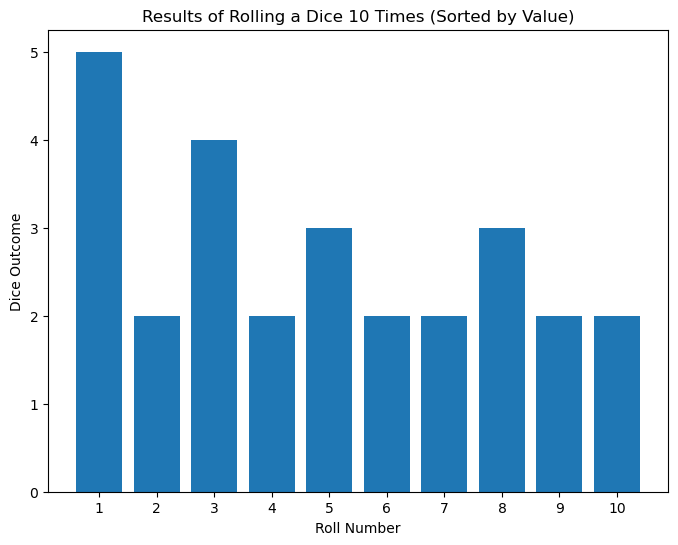

In [23]:
 # Sort the DataFrame by the 'Outcome' column
df_sorted = df.sort_values(by='Outcome')

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(df_sorted['Roll'], df_sorted['Outcome'])
plt.xlabel('Roll Number')
plt.ylabel('Dice Outcome')
plt.title('Results of Rolling a Dice 10 Times (Sorted by Value)')
plt.xticks(df_sorted['Roll'])
plt.show()



# 
#3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [24]:
#Calculate the frequency distribution
frequency_distribution = df['Outcome'].value_counts().sort_index()
frequency_distribution

2    6
3    2
4    1
5    1
Name: Outcome, dtype: int64

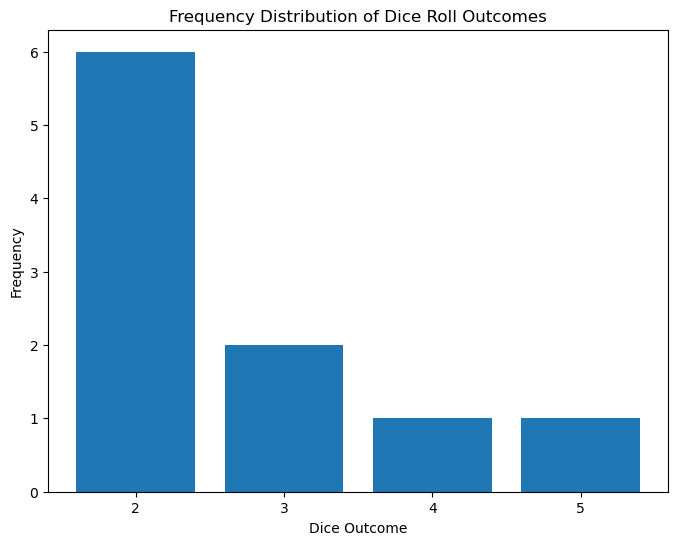

In [25]:
# Create a bar plot for the frequency distribution
plt.figure(figsize=(8, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values)
plt.xlabel('Dice Outcome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Dice Roll Outcomes')
plt.xticks(frequency_distribution.index)
plt.show()


# 
. calculate the frequency distribution using the value_counts() function on the 'Outcome' column of the DataFrame. This function counts how many times each unique outcome appears and sorts the results by the outcome values.

. Then creating a bar plot for the frequency distribution, where the x-axis represents the unique dice outcomes (1 to 6), and the y-axis represents the frequency (how many times each outcome occurred).


# Relation between the two plots:

The relation between the two plots is that the second plot summarizes the information from the first plot. It tells us, for each possible outcome of the dice (1 to 6), how many times it appeared in the sequence of 10 rolls. The first plot shows the individual rolls, while the second plot provides an overview of the distribution of outcomes across those rolls.
Both plots are related in that they depict aspects of the same dataset—dice rolls—but they emphasize different aspects: individual rolls vs.overall distribution.


# Challenge 2
Now, using the dice results obtained in challenge 1, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles.

1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value.

In [38]:
def calculate_mean(data):
    """
    Calculate the mean of a list of data points.

    Parameters:
    data (list): A list of numerical data.

    Returns:
    float: The mean of the data.
    """
    if len(data) == 0:
        raise ValueError("Input data is empty. Mean cannot be calculated.")

    sum_of_data = 0
    num_observations = len(data)

    for value in data:
        sum_of_data += value

    mean = sum_of_data / num_observations
    return mean


In [39]:
dice_outcomes = [5, 2, 4, 2, 3, 2, 2, 3, 2, 2]
mean = calculate_mean(dice_outcomes)
print("Mean (Method 1):", mean)

Mean (Method 1): 2.7


. Used a Python function to compute the mean without using any built-in mean calculation functions

. Calculated the mean (average) of a dataset by summing all the observations and dividing by the total number of observations. 

# 
#2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value.

In [40]:
# Defining a function to calculate the mean without using any built-in mean calculations:
def calculate_mean_from_frequency_distribution(frequency_distribution):
    """
    Calculate the mean from a frequency distribution.

    Parameters:
    frequency_distribution (dict):   A dictionary where keys are unique outcomes (values)
                                    and values are their corresponding frequencies.

    Returns:
    float: The mean of the data.
    """
    if not frequency_distribution:
        raise ValueError("Frequency distribution is empty. Mean cannot be calculated.")

    sum_of_products = 0
    total_frequency = 0

    for outcome, frequency in frequency_distribution.items():
        sum_of_products += outcome * frequency
        total_frequency += frequency

    mean = sum_of_products / total_frequency
    return mean

dice_outcomes = [5, 2, 4, 2, 3, 2, 2, 3, 2, 2]

# Calculate the frequency distribution
frequency_distribution = {}
for outcome in dice_outcomes:
    if outcome in frequency_distribution:
        frequency_distribution[outcome] += 1
    else:
        frequency_distribution[outcome] = 1

mean_from_frequency = calculate_mean_from_frequency_distribution(frequency_distribution)
print("Mean (Method 2 - Using Frequency Distribution):", mean_from_frequency)


Mean (Method 2 - Using Frequency Distribution): 2.7



. calculate the frequency distribution using a dictionary where keys are unique outcomes (dice values), and values are their corresponding frequencies.

. iterate through the frequency distribution, calculating the sum of products (outcome * frequency) and the total frequency.

. Finally, divide the sum of products by the total frequency to compute the mean.

This function is giving us the mean of our dataset using the frequency distribution values.


# 
#3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value.
Hint: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [66]:
# Defining a function to calculate the median without using any built-in median calculation functions,
def calculate_median(data):
    """
    Calculate the median of a list of data points.

    Parameters:
    data (list): A list of numerical data.

    Returns:
    float: The median of the data.
    """
    if len(data) == 0:
        raise ValueError("Input data is empty. Median cannot be calculated.")

   # First, sort the data in ascending order
data = [1, 3, 2, 4, 6]
sorted_data = sorted(data)
num_observations = len(sorted_data)
num_observations

5

In [83]:
 # Check if the number of observations is even or odd
    
if num_observations % 2 == 0:  # Even number of observations
        middle1 = sorted_data[num_observations // 2 - 1]
        middle2 = sorted_data[num_observations // 2]
        median = (middle1 + middle2) / 2
else:  # Odd number of observations
        median = sorted_data[num_observations // 2]
return median


# Example usage with some data
data_even = [1, 3, 2, 6]
data_odd = [2, 4, 6]

median_even = calculate_median(data_even)
median_odd = calculate_median(data_odd)

print("Median (Even):", median_even)
print("Median (Odd):", median_odd)


SyntaxError: 'return' outside function (2944751969.py, line 9)

#
. Sort the data in ascending order using the sorted() function.

. Check whether the number of observations is even or odd using the modulo operator (%).

. If there is an even number of observations, calculate the median as the average of the two middle values. If there is an odd number of observations, we simply take the middle value.

. This function will calculate the median of our dataset correctly, regardless of whether the number of observations is even or odd.

# Note for TA's: 
for above code I get error " return outside function". But If I write the code in one cell which is given below.It doesnt give me any error.

In [84]:
def calculate_median(data):
    """
    Calculate the median of a list of data points.

    Parameters:
    data (list): A list of numerical data.

    Returns:
    float: The median of the data.
    """
    if len(data) == 0:
        raise ValueError("Input data is empty. Median cannot be calculated.")

    # First, sort the data in ascending order
    data = [1, 3, 2, 4, 6]
    sorted_data = sorted(data)
    num_observations = len(sorted_data)
    num_observations

    # Check if the number of observations is even or odd
    if num_observations % 2 == 0:  # Even number of observations
        middle1 = sorted_data[num_observations // 2 - 1]
        middle2 = sorted_data[num_observations // 2]
        median = (middle1 + middle2) / 2
    else:  # Odd number of observations
        median = sorted_data[num_observations // 2]

    return median

# Taking from 
data_even = [1, 3, 2, 6]
data_odd = [2, 4, 6]

median_even = calculate_median(data_even)
median_odd = calculate_median(data_odd)

print("Median (Even):", median_even)
print("Median (Odd):", median_odd)

Median (Even): 3
Median (Odd): 3


#
4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles.

In [86]:
def calculate_quartiles(data):
    """
    Calculate the quartiles (Q1, Q2, and Q3) of a list of data points.

    Parameters:
    data (list): A list of numerical data.

    Returns:
    tuple: A tuple containing the first quartile (Q1), median (Q2), and third quartile (Q3).
    """
    if len(data) == 0:
        raise ValueError("Input data is empty. Quartiles cannot be calculated.")

    # First, sort the data in ascending order
    sorted_data = sorted(data)
    num_observations = len(sorted_data)

    # Calculate the median (Q2)
    if num_observations % 2 == 0:  # Even number of observations
        middle1 = sorted_data[num_observations // 2 - 1]
        middle2 = sorted_data[num_observations // 2]
        Q2 = (middle1 + middle2) / 2
    else:  # Odd number of observations
        Q2 = sorted_data[num_observations // 2]
        
     # Calculate the first quartile (Q1)
    lower_half = sorted_data[:num_observations // 2]
    num_lower_half = len(lower_half)
    if num_lower_half % 2 == 0:  # Even number of observations in lower half
        middle1 = lower_half[num_lower_half // 2 - 1]
        middle2 = lower_half[num_lower_half // 2]
        Q1 = (middle1 + middle2) / 2
    else:  # Odd number of observations in lower half
        Q1 = lower_half[num_lower_half // 2]

   
    # Calculate the third quartile (Q3)
    upper_half = sorted_data[num_observations // 2 + (1 if num_observations % 2 != 0 else 0):]
    num_upper_half = len(upper_half)
    if num_upper_half % 2 == 0:  # Even number of observations in upper half
        middle1 = upper_half[num_upper_half // 2 - 1]
        middle2 = upper_half[num_upper_half // 2]
        Q3 = (middle1 + middle2) / 2
    else:  # Odd number of observations in upper half
        Q3 = upper_half[num_upper_half // 2]

    return Q1, Q2, Q3

# Example usage with some data
data = [1, 3, 2, 4, 6, 7, 8, 9]
Q1, Q2, Q3 = calculate_quartiles(data)
print("First Quartile (Q1):", Q1)
print("Median (Q2):", Q2)
print("Third Quartile (Q3):", Q3)


First Quartile (Q1): 2.5
Median (Q2): 5.0
Third Quartile (Q3): 7.5


#
. Sort the data in ascending order.

. calculate the median (Q2) as shown in the previous median calculation function.

. calculate the first quartile (Q1) based on the lower half of the data.

. calculate the third quartile (Q3) based on the upper half of the data.

The function returns a tuple containing the values of Q1, Q2 (median), and Q3.

# Challenge 3
Read the csv roll_the_dice_hundred.csv from the data folder.

1.- Sort the values and plot them. What do you see?

In [90]:
df = pd.read_csv("roll_the_dice_hundred.csv")
df.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [93]:
# Sort the values in ascending order
sorted_values = df['value'].sort_values()

df.head()


,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [97]:
df.shape

(100, 3)

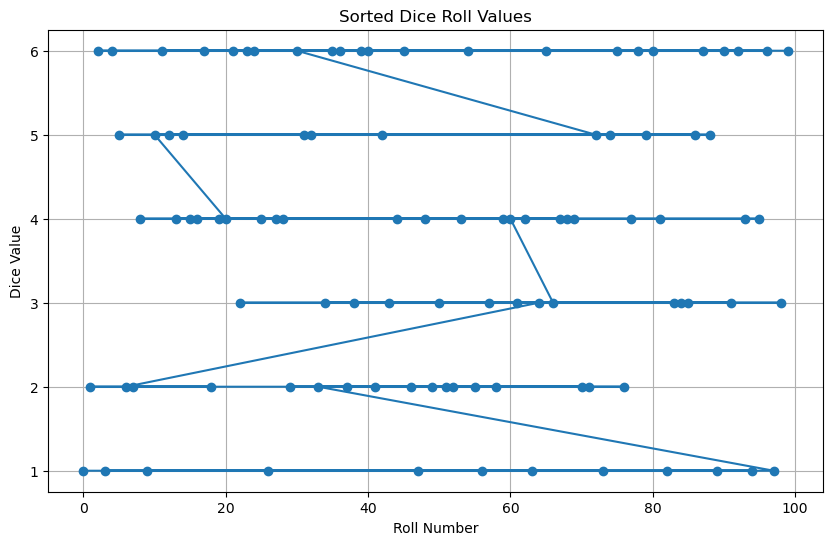

In [95]:
# Plot the sorted values
plt.figure(figsize=(10, 6))
plt.plot(sorted_values, marker='o', linestyle='-')
plt.title('Sorted Dice Roll Values')
plt.xlabel('Roll Number')
plt.ylabel('Dice Value')
plt.grid(True)
plt.show()


#
It is displaying a plot showing how the dice roll values are distributed in ascending order. 

##But I dont understand what roll or pattern it is following##

# 
#2.- Using the functions you defined in challenge 2, calculate the mean value of the hundred dice rolls

In [113]:
# Define the calculate_mean function
def calculate_mean(data):
    """
    Calculate the mean of a list of data points.

    Parameters:
    data (list): A list of numerical data.

    Returns:
    float: The mean of the data.
    """
    if len(data) == 0:
        raise ValueError("Input data is empty. Mean cannot be calculated.")

    sum_of_data = sum(data)
    num_observations = len(data)

    mean = sum_of_data / num_observations
    return mean

# Extract the dice roll outcomes as a list
dice_outcomes1 = df['value'].tolist()

dice_outcomes1


[1,
 2,
 6,
 1,
 6,
 5,
 2,
 2,
 4,
 1,
 5,
 6,
 5,
 4,
 5,
 4,
 4,
 6,
 2,
 4,
 4,
 6,
 3,
 6,
 6,
 4,
 1,
 4,
 4,
 2,
 6,
 5,
 5,
 2,
 3,
 6,
 6,
 2,
 3,
 6,
 6,
 2,
 5,
 3,
 4,
 6,
 2,
 1,
 4,
 2,
 3,
 2,
 2,
 4,
 6,
 2,
 1,
 3,
 2,
 4,
 4,
 3,
 4,
 1,
 3,
 6,
 3,
 4,
 4,
 4,
 2,
 2,
 5,
 1,
 5,
 6,
 2,
 4,
 6,
 5,
 6,
 4,
 1,
 3,
 3,
 3,
 5,
 6,
 5,
 1,
 6,
 3,
 6,
 4,
 1,
 4,
 6,
 1,
 3,
 6]

In [114]:
# Calculate the mean of the dice roll outcomes
mean_dice_rolls = calculate_mean(dice_outcomes1)

print("Mean Value of Hundred Dice Rolls:", mean_dice_rolls)

Mean Value of Hundred Dice Rolls: 3.74


#
3.- Now, calculate the frequency distribution.

In [ ]:
# we can use Python's built-in collections.Counter class, which helps count the occurrences of each unique value 
# in a list. Here's how we can calculate the frequency distribution:

In [104]:
from collections import Counter

In [115]:
# Extract the dice roll outcomes as a list
dice_outcomes1 = df['value'].tolist()

# Calculate the frequency distribution
frequency_distribution = dict(Counter(dice_outcomes1))

print("Frequency Distribution of Hundred Dice Rolls:")
for outcome, frequency in sorted(frequency_distribution.items()):
    print(f"Outcome {outcome}: Frequency {frequency}")


Frequency Distribution of Hundred Dice Rolls:
Outcome 1: Frequency 12
Outcome 2: Frequency 17
Outcome 3: Frequency 14
Outcome 4: Frequency 22
Outcome 5: Frequency 12
Outcome 6: Frequency 23


# 
4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram?

In [116]:
# Extract the dice roll outcomes as a list
dice_outcomes1 = df['value'].tolist()


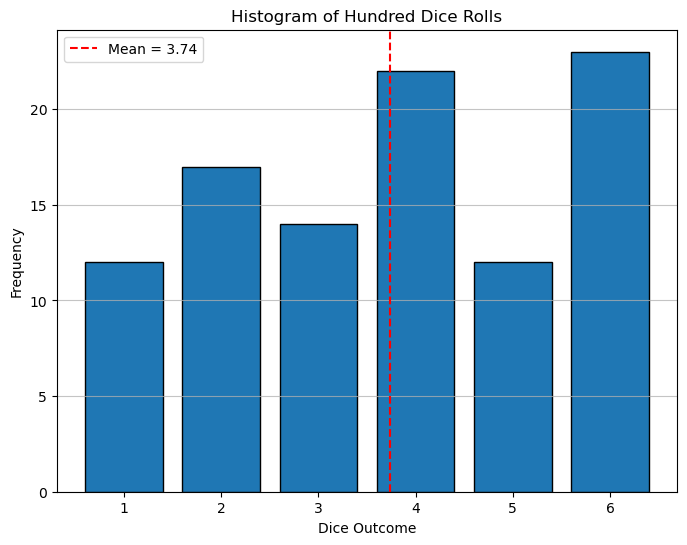

In [117]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(dice_outcomes1, bins=range(1, 8), rwidth=0.8, align='left', edgecolor='black')
plt.xlabel('Dice Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Hundred Dice Rolls')
plt.xticks(range(1, 7))
plt.grid(axis='y', alpha=0.75)

# Calculate the mean value
mean_dice_rolls = sum(dice_outcomes1) / len(dice_outcomes1)

# Add a vertical line for the mean value
plt.axvline(x=mean_dice_rolls, color='red', linestyle='--', label=f'Mean = {mean_dice_rolls:.2f}')
plt.legend()

plt.show()

In [110]:
"""
your comments here
"""
# This seems symmetrical
# The mean value represents the central tendency of the data, and its position on the histogram gives an idea 
# of where the "center" of the distribution lies. Here the mean is between 3 and 4.
    

'\nyour comments here\n'

# 
5.- Read the roll_the_dice_thousand.csv from the data folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [118]:
# Extract the dice roll outcomes as a list
dice_outcomes = dice_df['value'].tolist()

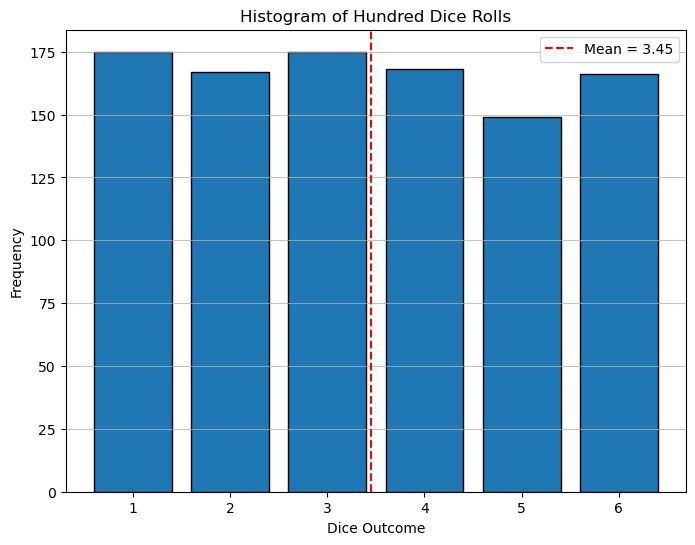

In [119]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(dice_outcomes, bins=range(1, 8), rwidth=0.8, align='left', edgecolor='black')
plt.xlabel('Dice Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Hundred Dice Rolls')
plt.xticks(range(1, 7))
plt.grid(axis='y', alpha=0.75)

# Calculate the mean value
mean_dice_rolls = sum(dice_outcomes) / len(dice_outcomes)

# Add a vertical line for the mean value
plt.axvline(x=mean_dice_rolls, color='red', linestyle='--', label=f'Mean = {mean_dice_rolls:.2f}')
plt.legend()

plt.show()

#
1. yes in this histogram the vertical line for mean value is '3.45' exact at the centre which is theoratically closer to 3.5. and in the previous one the mean value is '3.74' more aligned towards '4'

# Challenge 4
In the data folder of this repository you will find three different files with the prefix ages_population. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

1.- Read the file ages_population.csv. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot.

In [122]:
# Read the CSV file containing age data
ages_population = pd.read_csv('ages_population.csv')
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [123]:
ages_population.shape

(1000, 1)

In [125]:
# Extract the ages as a list
ages = ages_population['observation'].tolist()

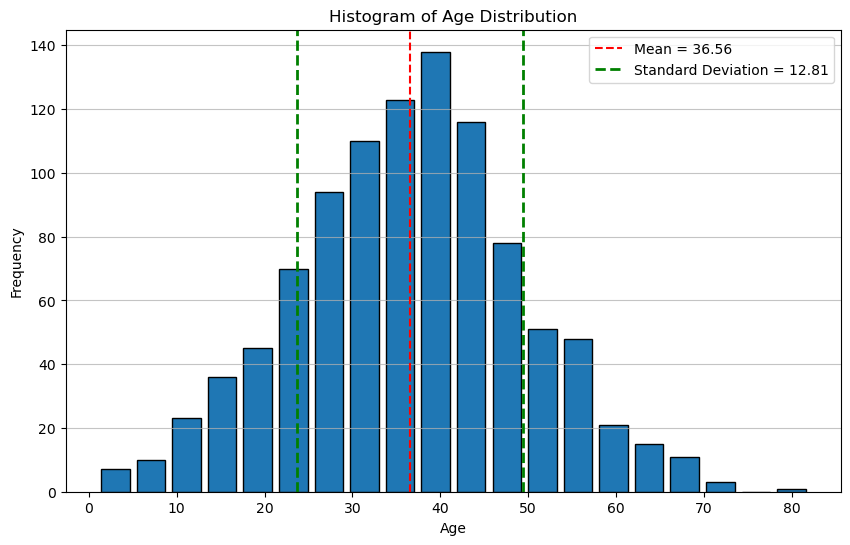

In [126]:

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, rwidth=0.8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.grid(axis='y', alpha=0.75)

# Calculate the mean and standard deviation
mean_age = sum(ages) / len(ages)
std_deviation = (sum((x - mean_age) ** 2 for x in ages) / len(ages)) ** 0.5

# Display the mean and standard deviation on the plot
plt.axvline(x=mean_age, color='red', linestyle='--', label=f'Mean = {mean_age:.2f}')
plt.axvline(x=mean_age + std_deviation, color='green', linestyle='--', label=f'Standard Deviation = {std_deviation:.2f}', linewidth=2)
plt.axvline(x=mean_age - std_deviation, color='green', linestyle='--', linewidth=2)
plt.legend()

plt.show()


#
#2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [128]:
import statistics

In [129]:

# Extract the ages as a list
ages = ages_population['observation'].tolist()

# Calculate the exact mean and standard deviation
mean_age_exact = statistics.mean(ages)
std_deviation_exact = statistics.stdev(ages)

# Print the exact mean and standard deviation
print("Exact Mean Age:", mean_age_exact)
print("Exact Standard Deviation:", std_deviation_exact)


Exact Mean Age: 36.56
Exact Standard Deviation: 12.81649962597677


In [ ]:
"""
your comments here
"""

# 
#3.- Now read the file ages_population2.csv . Calculate the frequency distribution and plot it

In [130]:
ages_population2 = pd.read_csv('ages_population2.csv')
ages_population2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [131]:
ages_population2.shape

(1000, 1)

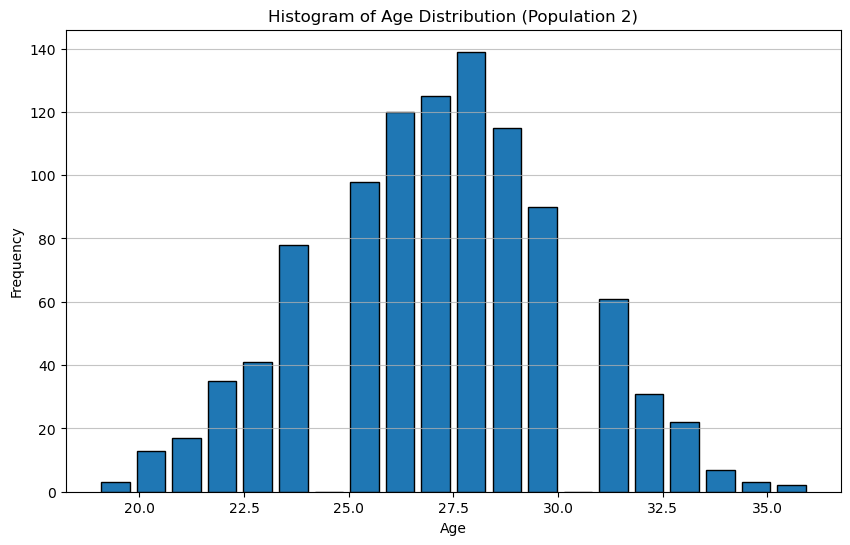

In [138]:
# Extract the ages as a list
ages = ages_population2['observation'].tolist()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, rwidth=0.8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Population 2)')
plt.grid(axis='y', alpha=0.75)

plt.show()

# 
#4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes we can see the difference. There is a gap in 'Ages' it is not showing any frequency in that age gap.
""

# 
#5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

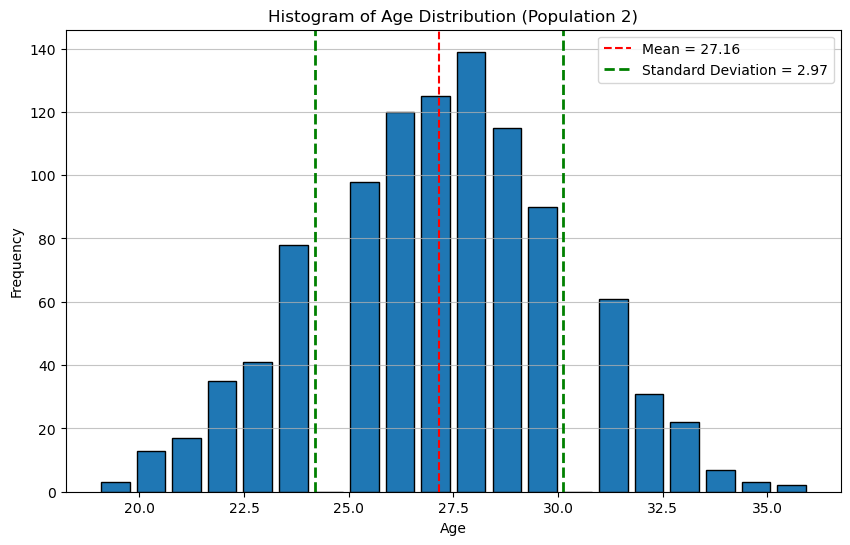

In [137]:
# Extract the ages as a list
ages = ages_population2['observation'].tolist()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, rwidth=0.8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Population 2)')
plt.grid(axis='y', alpha=0.75)

# Calculate the mean and standard deviation
mean_age = sum(ages) / len(ages)
std_deviation = (sum((x - mean_age) ** 2 for x in ages) / len(ages)) ** 0.5

# Display the mean and standard deviation on the plot
plt.axvline(x=mean_age, color='red', linestyle='--', label=f'Mean = {mean_age:.2f}')
plt.axvline(x=mean_age + std_deviation, color='green', linestyle='--', label=f'Standard Deviation = {std_deviation:.2f}', linewidth=2)
plt.axvline(x=mean_age - std_deviation, color='green', linestyle='--', linewidth=2)
plt.legend()

plt.show()

# Key differences between the two datasets are:

For Mean (Average):

In dataset "ages_population.csv," the mean age is 36.56.
In dataset "ages_population2.csv," the mean age is 27.16.
The mean age in "ages_population2.csv" is showing lower than in "ages_population.csv."

Standard Deviation (Spread or Variability):

In dataset "ages_population.csv," the standard deviation is 12.82, indicating a relatively wide spread of ages.
In dataset "ages_population2.csv," the standard deviation is 2.97, indicating a much narrower spread of ages.
The data in "ages_population2.csv" is less spread out compared to "ages_population.csv."

These differences suggest us that the two datasets represent different populations with distinct age distributions. 



# Challenge 5
Now is the turn of ages_population3.csv.

1.- Read the file ages_population3.csv. Calculate the frequency distribution and plot it.

In [144]:
ages_population3 = pd.read_csv('ages_population3.csv')
ages_population3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [141]:
ages_population3.shape

(1000, 1)

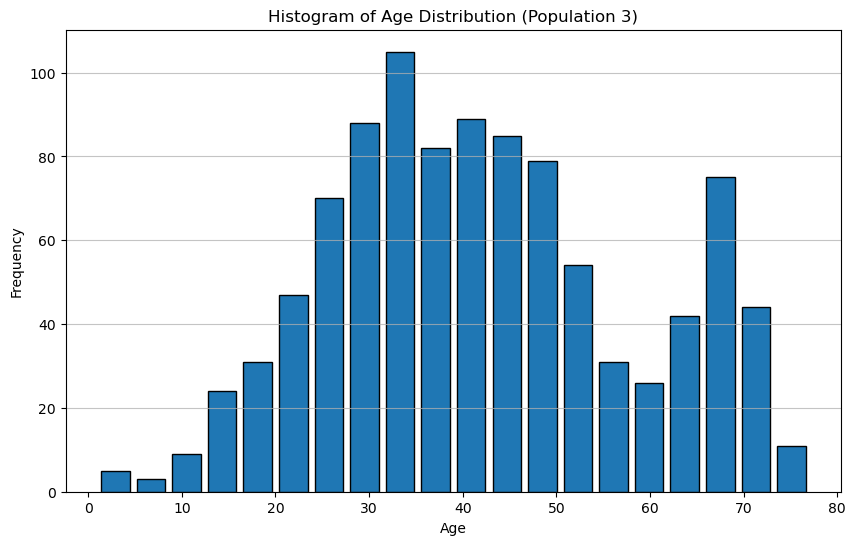

In [142]:

# Extract the ages as a list
ages = ages_population3['observation'].tolist()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, rwidth=0.8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Population 3)')
plt.grid(axis='y', alpha=0.75)

plt.show()


# 
2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [149]:
# Extract the ages as a list
ages = ages_population3['observation'].tolist()

# Calculate the exact mean and standard deviation
mean_age_exact = statistics.mean(ages)
std_deviation_exact = statistics.stdev(ages)

# Print the exact mean and standard deviation
print("Exact Mean Age (Population 3):", mean_age_exact)
print("Exact Standard Deviation (Population 3):", std_deviation_exact)


Exact Mean Age (Population 3): 41.989
Exact Standard Deviation (Population 3): 16.14470595986593


In [ ]:
"""
your comments here
"""

#
#3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [150]:
# Extract the ages as a list
ages = ages_population3['observation'].tolist()

# Calculate the four quartiles
def calculate_quartiles(data):
    data_sorted = sorted(data)
    n = len(data_sorted)
    Q1_index = (n + 1) // 4
    Q2_index = (n + 1) // 2
    Q3_index = 3 * (n + 1) // 4
    Q1 = data_sorted[Q1_index - 1]
    Q2 = data_sorted[Q2_index - 1]
    Q3 = data_sorted[Q3_index - 1]
    Q4 = data_sorted[-1]
    return Q1, Q2, Q3, Q4

Q1, Q2, Q3, Q4 = calculate_quartiles(ages)

# Calculate the median
median = statistics.median(ages)

# Calculate the mean
mean = statistics.mean(ages)

# Print quartiles, median, and mean
print("First Quartile (Q1):", Q1)
print("Second Quartile (Median, Q2):", median)
print("Third Quartile (Q3):", Q3)
print("Fourth Quartile (Q4):", Q4)
print("Mean:", mean)


First Quartile (Q1): 30.0
Second Quartile (Median, Q2): 40.0
Third Quartile (Q3): 53.0
Fourth Quartile (Q4): 77.0
Mean: 41.989


In [ ]:
"""
your comments here
"""

# 
#4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [151]:

# Extract the ages as a list
ages = ages_population3['observation'].tolist()

# Calculate the specified percentiles
percentiles = [10, 90, 95]
percentile_values = np.percentile(ages, percentiles)

# Print the calculated percentiles
for p, value in zip(percentiles, percentile_values):
    print(f"{p}th Percentile: {value:.2f}")


10th Percentile: 22.00
90th Percentile: 67.00
95th Percentile: 70.00


# Calculate the 10th, 90th, and 95th percentiles to understand the spread and tail behavior of the distribution
10th Percentile: This represents the value below which 10% of the ages fall. It gives us an idea of the lower end of the age distribution.

90th Percentile: This represents the value below which 90% of the ages fall. It gives us an idea of the upper end of the age distribution.

95th Percentile: This represents the value below which 95% of the ages fall. It provides information about the extreme upper end of the age distribution.

# Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""